In [1]:
# Clean data in datapoints.

with open ("datapoints.txt","r") as f_read:
    
    datapoints_list_step_01 = [data.strip("\n").replace(",","") for data in f_read.readlines() if data[0].isdigit()]
    datapoints_list_step_02 = [data.split() for data in datapoints_list_step_01]

datapoints_list_step_02

[['21.959384499160468', '31.23956701424158', '0'],
 ['23.63591632187622', '36.46821490673444', '1'],
 ['17.714056417303343', '31.44170391314962', '0'],
 ['21.78020031891186', '33.213397759738264', '1'],
 ['25.20630552859312', '36.558816149350534', '1'],
 ['19.332572350434354', '32.25325633655492', '0'],
 ['24.73645685241186', '35.33291181124776', '1'],
 ['23.79257560586339', '38.10372825362463', '1'],
 ['24.557612968127465', '36.73144402805611', '1'],
 ['20.191281253428173', '35.06966921830237', '0'],
 ['25.813562951888365', '35.561029988644336', '1'],
 ['24.923378667802954', '34.463907946680294', '1'],
 ['25.311244044578427', '34.117212558131975', '1'],
 ['22.819091361866796', '34.25516433025548', '1'],
 ['19.639358214988224', '34.56117030001663', '0'],
 ['18.341233265627693', '31.399261188293124', '0'],
 ['22.723629043769336', '34.83845262048311', '1'],
 ['25.82936770950206', '33.16210202637511', '1'],
 ['20.23890182459327', '32.78945132868386', '0'],
 ['17.905128921789093', '28.8881

In [2]:
# Convert String to Float.

datapoints_list_float = []
for element in datapoints_list_step_02:
    sublist = []
    for string in element:
        converted_float = float(string)
        sublist.append(converted_float)
    datapoints_list_float.append(sublist)

print(datapoints_list_float)

[[21.959384499160468, 31.23956701424158, 0.0], [23.63591632187622, 36.46821490673444, 1.0], [17.714056417303343, 31.44170391314962, 0.0], [21.78020031891186, 33.213397759738264, 1.0], [25.20630552859312, 36.558816149350534, 1.0], [19.332572350434354, 32.25325633655492, 0.0], [24.73645685241186, 35.33291181124776, 1.0], [23.79257560586339, 38.10372825362463, 1.0], [24.557612968127465, 36.73144402805611, 1.0], [20.191281253428173, 35.06966921830237, 0.0], [25.813562951888365, 35.561029988644336, 1.0], [24.923378667802954, 34.463907946680294, 1.0], [25.311244044578427, 34.117212558131975, 1.0], [22.819091361866796, 34.25516433025548, 1.0], [19.639358214988224, 34.56117030001663, 0.0], [18.341233265627693, 31.399261188293124, 0.0], [22.723629043769336, 34.83845262048311, 1.0], [25.82936770950206, 33.16210202637511, 1.0], [20.23890182459327, 32.78945132868386, 0.0], [17.905128921789093, 28.88813385482529, 0.0], [24.385289647525166, 37.335669057387726, 1.0], [26.525412887538252, 35.219220544

In [3]:
# Sorted lists.

pichus_list, pikachus_list = [], []
for element in datapoints_list_float:
    if element[2] == 0.0:
        pichus_list.append(element)
    else:
        pikachus_list.append(element)
print (pichus_list)
print (pikachus_list)

[[21.959384499160468, 31.23956701424158, 0.0], [17.714056417303343, 31.44170391314962, 0.0], [19.332572350434354, 32.25325633655492, 0.0], [20.191281253428173, 35.06966921830237, 0.0], [19.639358214988224, 34.56117030001663, 0.0], [18.341233265627693, 31.399261188293124, 0.0], [20.23890182459327, 32.78945132868386, 0.0], [17.905128921789093, 28.88813385482529, 0.0], [19.299333494980544, 30.486337996080024, 0.0], [20.118681851201636, 31.89116680793916, 0.0], [17.96926166354966, 32.48406633310577, 0.0], [21.58631807419169, 30.975094109600928, 0.0], [18.659636883604406, 33.04492931889734, 0.0], [19.209914415003638, 31.420355685575746, 0.0], [18.16229126686346, 29.93643755301725, 0.0], [19.120619567709372, 30.699542112256864, 0.0], [18.583516818010633, 31.317010181098944, 0.0], [20.282109030336354, 33.18796105898338, 0.0], [17.672876665469843, 32.67247775608707, 0.0], [20.795121649361587, 32.493051910886486, 0.0], [20.101930916301317, 31.19190374413498, 0.0], [20.39204407747099, 32.0877419

In [4]:
# Width and Height.

pichus_width, pichus_height = [], []
for element in pichus_list:
    pichus_width.append(element[0])
    pichus_height.append(element[1])

pikachus_width, pikachus_height = [], []
for element in pikachus_list:
    pikachus_width.append(element[0])
    pikachus_height.append(element[1])

print(pichus_width)
print(pichus_height)
print(pikachus_width)
print(pikachus_height)

[21.959384499160468, 17.714056417303343, 19.332572350434354, 20.191281253428173, 19.639358214988224, 18.341233265627693, 20.23890182459327, 17.905128921789093, 19.299333494980544, 20.118681851201636, 17.96926166354966, 21.58631807419169, 18.659636883604406, 19.209914415003638, 18.16229126686346, 19.120619567709372, 18.583516818010633, 20.282109030336354, 17.672876665469843, 20.795121649361587, 20.101930916301317, 20.39204407747099, 20.098954730848863, 20.88810038727894, 18.59843317023302, 21.069573240979203, 20.276898330625336, 19.592545899041802, 20.323269906838078, 21.35018601896744, 20.1569063412357, 18.929553010373773, 19.499062316347583, 20.579090632339703, 19.69944356712352, 19.893039297257797, 20.554378047506688, 19.55060327163345, 20.759216855120783, 20.008781128403864, 19.56686423226426, 21.762001750531006, 18.989418138097026, 19.689909518113225, 20.670175582205307, 19.615470460641276, 19.63004376836659, 23.213535136458052, 20.286130095999752, 18.310337204918557, 19.5108460168

In [5]:
# TESTPOINTS.
with open ("testpoints.txt","r") as f_read:
    
   testpoints_list_step_01 = [data.strip("\n").replace(",","").replace("(","").replace(")","") for data in f_read.readlines() if data[0].isdigit()]
   testpoints_list_step_02 = [data.split()[1:] for data in testpoints_list_step_01]
testpoints_list_step_02

testpoints_list_float = []
for element in testpoints_list_step_02:
    sublist = []
    for string in element:
        converted_float = float(string)
        sublist.append(converted_float)
    testpoints_list_float.append(sublist)

print(testpoints_list_float)


test_width, test_height = [], []
for element in testpoints_list_float:
    test_width.append(element[0])
    test_height.append(element[1])


print(test_width)
print(test_height)


[[25.0, 32.0], [24.2, 31.5], [22.0, 34.0], [20.5, 34.0]]
[25.0, 24.2, 22.0, 20.5]
[32.0, 31.5, 34.0, 34.0]


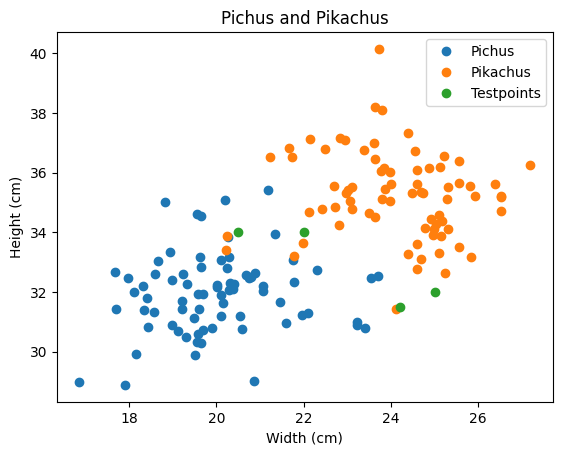

In [6]:
# Plot.

import matplotlib.pyplot as plt

x1, y1 = pichus_width, pichus_height
x2, y2 = pikachus_width, pikachus_height

x3, y3 = test_width, test_height

plt.plot(x1,y1,'o')
plt.plot(x2,y2,'o')
plt.plot(x3,y3,'o')
plt.title("Pichus and Pikachus")
plt.xlabel("Width (cm)")
plt.ylabel("Height (cm)")
plt.legend(["Pichus", "Pikachus", "Testpoints"])

plt.show()

In [7]:
# Pichus test

import math

distance_pichus_01 = []
for l in pichus_list:
    distance = math.sqrt((l[0] - test_width[0])**2 + (l[1] - test_height[0])**2)
    distance_pichus_01.append(distance)
distance_pichus_01.sort()

distance_pichus_02 = []
for l in pichus_list:
    distance = math.sqrt((l[0] - test_width[1])**2 + (l[1] - test_height[1])**2)
    distance_pichus_02.append(distance)
distance_pichus_02.sort()

distance_pichus_03 = []
for l in pichus_list:
    distance = math.sqrt((l[0] - test_width[2])**2 + (l[1] - test_height[2])**2)
    distance_pichus_03.append(distance)
distance_pichus_03.sort()

distance_pichus_04 = []
for l in pichus_list:
    distance = math.sqrt((l[0] - test_width[3])**2 + (l[1] - test_height[3])**2)
    distance_pichus_04.append(distance)
distance_pichus_04.sort()

print(distance_pichus_01)
print(distance_pichus_02)
print(distance_pichus_03)
print(distance_pichus_04)

[1.405938571427235, 1.5334840155713727, 1.9935260555425007, 2.045814476254729, 2.1056584162623655, 2.795536907095536, 2.9946629996148713, 3.1342624251608395, 3.2295550662804375, 3.4066543870057955, 3.558751286516523, 3.564218901072862, 3.921264732586414, 3.9365436620361485, 4.136700195030928, 4.162025992565388, 4.233686588600583, 4.2658384027079705, 4.366555374904225, 4.518655670216102, 4.58854357477802, 4.595958909911408, 4.60879121150983, 4.686072056373611, 4.714172072567614, 4.826104975673654, 4.8565059845288605, 4.865156387958634, 4.882531262929347, 4.964282456451075, 4.9867590255021295, 4.993560935692461, 5.015947705672343, 5.071247993436599, 5.094370062024012, 5.108567218536976, 5.247721252778881, 5.3105382062056155, 5.4144052810540435, 5.416758727816007, 5.42635882153703, 5.454138565345194, 5.495953297029337, 5.567821812542812, 5.5872714480411, 5.625114236539731, 5.673083371066072, 5.684902165452815, 5.704966703971587, 5.78496484113067, 5.793866365621854, 5.819027290950527, 5.87

In [8]:
# Pikachus test.

import math

distance_pikachus_01 = []
for l in pikachus_list:
    distance = math.sqrt((l[0] - test_width[0])**2 + (l[1] - test_height[0])**2)
    distance_pikachus_01.append(distance)
distance_pikachus_01.sort()

distance_pikachus_02 = []
for l in pikachus_list:
    distance = math.sqrt((l[0] - test_width[1])**2 + (l[1] - test_height[1])**2)
    distance_pikachus_02.append(distance)
distance_pikachus_02.sort()

distance_pikachus_03 = []
for l in pikachus_list:
    distance = math.sqrt((l[0] - test_width[2])**2 + (l[1] - test_height[2])**2)
    distance_pikachus_03.append(distance)
distance_pikachus_03.sort()

distance_pikachus_04 = []
for l in pikachus_list:
    distance = math.sqrt((l[0] - test_width[3])**2 + (l[1] - test_height[3])**2)
    distance_pikachus_04.append(distance)
distance_pikachus_04.sort()

print(distance_pikachus_01)
print(distance_pikachus_02)
print(distance_pikachus_03)
print(distance_pikachus_04)

[0.6829635758323602, 0.8829834980050161, 1.0623655711316322, 1.1483506635878937, 1.3042926733824607, 1.4214199522923856, 1.4277016205320445, 1.6220435525527015, 1.6694793213039807, 1.9000844105707402, 1.92323556047951, 2.109813062390686, 2.1399677267653545, 2.163028256061473, 2.2827901216880258, 2.4001190857580688, 2.4650990240276256, 2.5869540314674677, 2.876152825708887, 3.0505182472152863, 3.098060619590939, 3.1372167034396403, 3.143582515448482, 3.2260589926366356, 3.334126822030886, 3.3433151410232775, 3.3510903150659375, 3.3588576822580993, 3.362240740336625, 3.3778593209502157, 3.430652024164659, 3.4408493296965403, 3.5275260880435244, 3.5304180020226754, 3.5623398762857184, 3.605356269957816, 3.6306261788740977, 3.637476512909947, 3.638499417218305, 3.6527823993100914, 3.710023449738221, 3.7533422243175028, 3.7958915903422024, 3.8779552531299815, 3.8850327604803505, 3.9373340521618427, 3.940277250995002, 4.002683153175278, 4.123400140778744, 4.143149899216151, 4.151488096450845